# Decision Tree

In [302]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import random
from sklearn.model_selection import train_test_split
from scipy.spatial.distance import euclidean

from sklearn.tree import DecisionTreeRegressor

In [303]:
transport = pd.read_csv("dataset.csv")

In [304]:
#Take a quick look at the data such as using head, describe, info
print(transport.head())
print(transport.info())
print(transport.describe())

        ID  travel_fee             departure_time  departure_long  \
0  54:00.0         7.0  2013-07-02 19:54:00+00:00      -74.005360   
1  21:31.0         5.5  2013-09-28 00:21:31+00:00      -74.014165   
2  18:00.0        21.5  2013-06-16 03:18:00+00:00      -73.991075   
3  43:00.0         9.5  2013-07-20 13:43:00+00:00      -74.002662   
4  57:17.0        15.5  2013-11-05 22:57:17+00:00      -73.962397   

   departure_lat  arrival_long  arrival_lat  occupancy  
0      40.728867    -74.008913    40.710907          1  
1      40.708941    -74.016310    40.716734          1  
2      40.760352    -73.941382    40.713292          1  
3      40.723630    -73.991722    40.748905          5  
4      40.712705    -73.996834    40.680403          2  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 8 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   ID              1048575 non-null

In [305]:
transport.head()

,ID,travel_fee,departure_time,departure_long,departure_lat,arrival_long,arrival_lat,occupancy
0,54:00.0,7.0,2013-07-02 19:54:00+00:00,-74.005360,40.728867,-74.008913,40.710907,1
1,21:31.0,5.5,2013-09-28 00:21:31+00:00,-74.014165,40.708941,-74.016310,40.716734,1
2,18:00.0,21.5,2013-06-16 03:18:00+00:00,-73.991075,40.760352,-73.941382,40.713292,1
3,43:00.0,9.5,2013-07-20 13:43:00+00:00,-74.002662,40.723630,-73.991722,40.748905,5
4,57:17.0,15.5,2013-11-05 22:57:17+00:00,-73.962397,40.712705,-73.996834,40.680403,2


In [306]:
# Exploring categorical variables
categorical_columns = ['ID','departure_time']
for column in categorical_columns:
    print("\nUnique values in", column)
    print(transport[column].unique())
    print("Value counts:")
    print(transport[column].value_counts())

# Analyzing numerical variables
numerical_columns = ['travel_fee','departure_long',"departure_lat",'arrival_long','arrival_lat', 'occupancy']

for column in numerical_columns:
    print("\nStatistics for", column)
    print("Minimum:", transport[column].min())
    print("Maximum:", transport[column].max())
    print("Mean:", transport[column].mean())
    print("Standard deviation:", transport[column].std())


Unique values in ID
['54:00.0' '21:31.0' '18:00.0' ... '28:13.0' '04:29.0' '00:25.0']
Value counts:
49:00.0    9375
39:00.0    9357
41:00.0    9332
43:00.0    9281
55:00.0    9267
           ... 
39:39.0     109
46:34.0     107
01:04.0     107
24:07.0     103
46:21.0     103
Name: ID, Length: 3600, dtype: int64

Unique values in departure_time
['2013-07-02 19:54:00+00:00' '2013-09-28 00:21:31+00:00'
 '2013-06-16 03:18:00+00:00' ... '2013-09-21 03:16:54+00:00'
 '2013-09-10 00:05:41+00:00' '2013-07-16 00:38:00+00:00']
Value counts:
2013-04-26 19:34:00+00:00    15
2013-04-20 18:02:00+00:00    13
2013-11-03 01:36:00+00:00    13
2013-05-04 18:47:00+00:00    13
2013-06-18 20:05:00+00:00    13
                             ..
2013-03-06 07:30:16+00:00     1
2013-10-17 21:55:38+00:00     1
2013-07-02 21:55:35+00:00     1
2013-11-22 11:00:20+00:00     1
2013-07-16 00:38:00+00:00     1
Name: departure_time, Length: 707115, dtype: int64

Statistics for travel_fee
Minimum: -52.0
Maximum: 450.0
Mea

In [307]:
num_rows = transport.shape[0]  # Get the number of rows
print("Number of rows in the DataFrame:", num_rows)

Number of rows in the DataFrame: 1048575


# Visualization

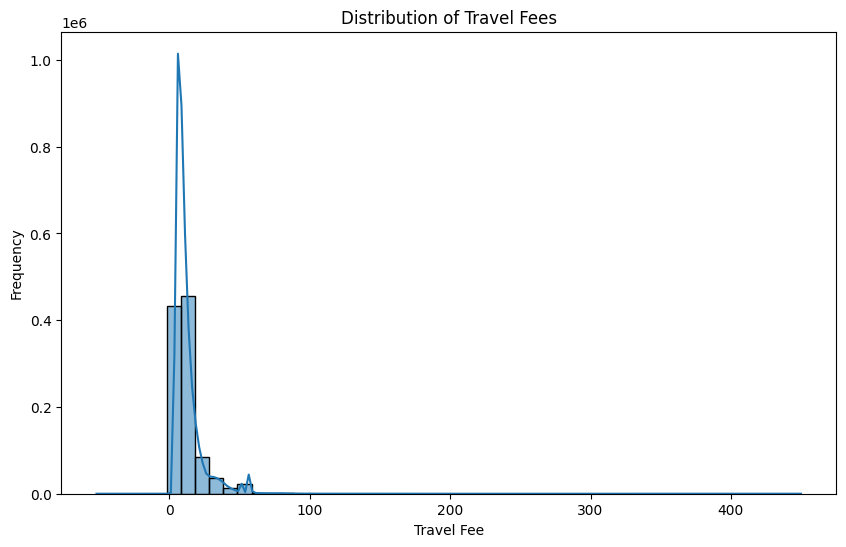

In [308]:
#Diagram 1 Travel Fees with Frequency
plt.figure(figsize=(10, 6))
sns.histplot(transport['travel_fee'], kde=True, bins=50)
plt.xlabel('Travel Fee')
plt.ylabel('Frequency')
plt.title('Distribution of Travel Fees')
plt.show()

## In this case we can know that The Travel Fee with it's frequency
## we also know that it has a heavy tails

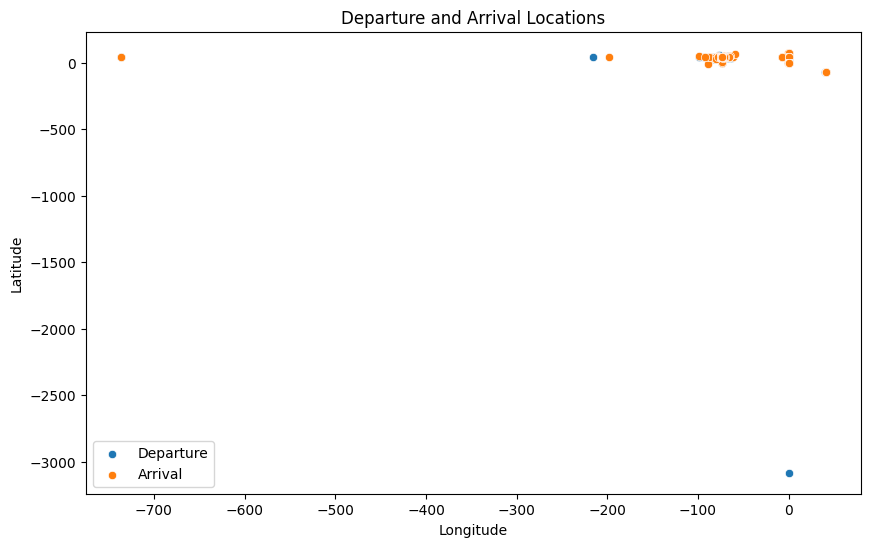

In [309]:
#Diagram 2 Departure and Arrival Locations
plt.figure(figsize=(10, 6))
sns.scatterplot(data=transport, x='departure_long', y='departure_lat', label='Departure')
sns.scatterplot(data=transport, x='arrival_long', y='arrival_lat', label='Arrival')
plt.title('Departure and Arrival Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

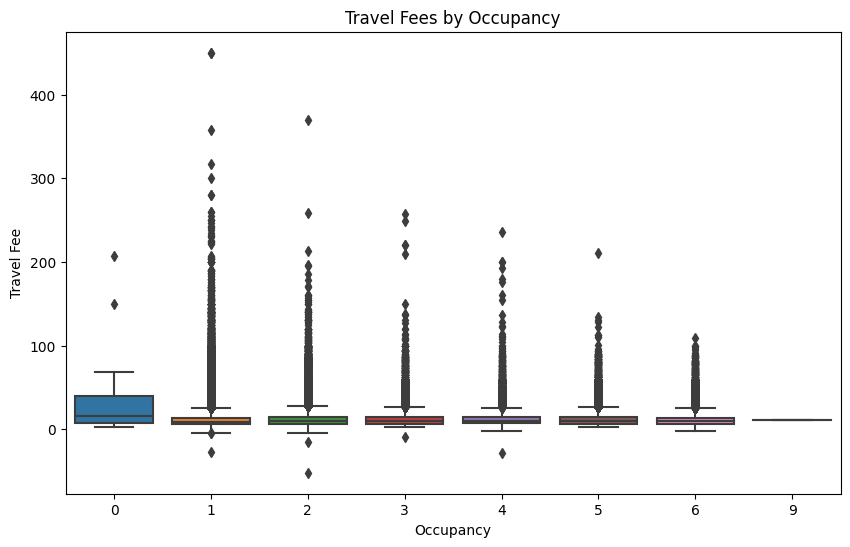

In [310]:
# Diagram 3 Boxplot of travel fees by occupancy
plt.figure(figsize=(10, 6))
sns.boxplot(data=transport, x='occupancy', y='travel_fee')
plt.title('Travel Fees by Occupancy')
plt.xlabel('Occupancy')
plt.ylabel('Travel Fee')
plt.show()
# In this box plot we can find out all the outlier to do data preprocessing

# Correlation

<Axes: >

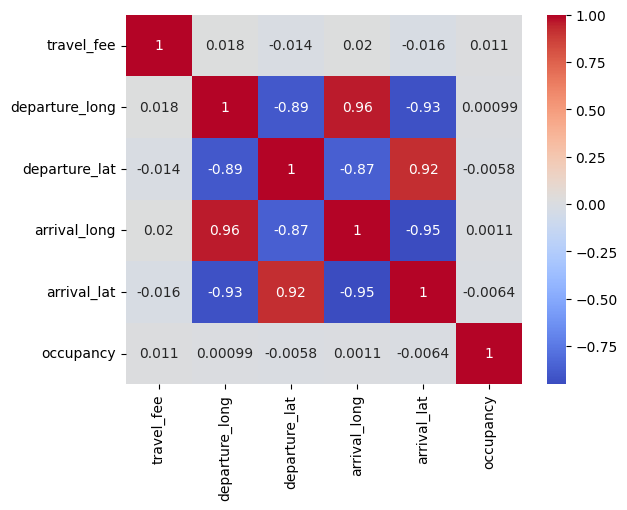

In [311]:
# identify which features are strongly correlated with each other
corr_matrix = transport[numerical_columns].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

In [312]:
corr_matrix = transport.corr(numeric_only=True)
corr_matrix

,travel_fee,departure_long,departure_lat,arrival_long,arrival_lat,occupancy
travel_fee,1.000000,0.018337,-0.013661,0.020053,-0.016276,0.011234
departure_long,0.018337,1.000000,-0.894042,0.959647,-0.929426,0.000993
departure_lat,-0.013661,-0.894042,1.000000,-0.867870,0.916689,-0.005826
arrival_long,0.020053,0.959647,-0.867870,1.000000,-0.953212,0.001107
arrival_lat,-0.016276,-0.929426,0.916689,-0.953212,1.000000,-0.006371
occupancy,0.011234,0.000993,-0.005826,0.001107,-0.006371,1.000000


# Data Preprocessing

In [313]:
sample_size = 50000
transport = transport.sample(n=sample_size)


travelfee_train, travelfee_test = train_test_split(transport, test_size=0.2, random_state=42)

print("Length of travelfee_train:", len(travelfee_train))
print("Length of travelfee_test:", len(travelfee_test))

Length of travelfee_train: 40000
Length of travelfee_test: 10000


In [314]:
#check is there any data is null value
transport.isnull().sum()

ID                0
travel_fee        0
departure_time    0
departure_long    0
departure_lat     0
arrival_long      0
arrival_lat       0
occupancy         0
dtype: int64

In [315]:
#handling missing value
travelfee_train["departure_long"].fillna(travelfee_train["departure_long"].mean(), inplace=True)
travelfee_train["departure_lat"].fillna(travelfee_train["departure_lat"].mean(), inplace=True)
travelfee_train["occupancy"].fillna(travelfee_train["occupancy"].mode()[0], inplace=True)
travelfee_train.drop(columns=['ID'], inplace=True)

# Drop rows with missing "departure_time","arrival_long" and "arrival_lat"
travelfee_train.dropna(subset=["departure_time", "arrival_long", "arrival_lat"],inplace = True)
travelfee_train.isnull().sum()

# Drop rows with a 0 value of occupancy
travelfee_train = travelfee_train.drop(travelfee_train[travelfee_train['occupancy'] <= 0].index)

# Handling Outliers
# Select columns for numeric attributes
num_attribs = ['departure_long', 'departure_lat', 'arrival_long', 'arrival_lat', 'occupancy', 'travel_fee']

# Remove outliers using Z-score method
z_scores = np.abs((travelfee_train[num_attribs] - travelfee_train[num_attribs].mean()) / travelfee_train[num_attribs].std())
travelfee_train = travelfee_train[(z_scores < 3).all(axis=1)]
travelfee_train.info()
travelfee_train

# Filter out rows with 0 values in departure_long, departure_lat, arrival_long, and arrival_lat
travelfee_train = travelfee_train[
    (travelfee_train["departure_long"] != 0) &
    (travelfee_train["departure_lat"] != 0) &
    (travelfee_train["arrival_long"] != 0) &
    (travelfee_train["arrival_lat"] != 0)
]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36701 entries, 51362 to 328888
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   travel_fee      36701 non-null  float64
 1   departure_time  36701 non-null  object 
 2   departure_long  36701 non-null  float64
 3   departure_lat   36701 non-null  float64
 4   arrival_long    36701 non-null  float64
 5   arrival_lat     36701 non-null  float64
 6   occupancy       36701 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 2.2+ MB


In [316]:
# Convert departure_time to datetime
travelfee_train['departure_time'] = pd.to_datetime(travelfee_train['departure_time'])

# Extract features from departure_time
travelfee_train['hour_of_day'] = travelfee_train['departure_time'].dt.hour
travelfee_train['day_of_week'] = travelfee_train['departure_time'].dt.dayofweek

# Calculate Euclidean distance between departure and arrival locations
travelfee_train['distance'] = travelfee_train.apply(lambda row: euclidean((row['departure_lat'], row['departure_long']),
                                                             (row['arrival_lat'], row['arrival_long'])), axis=1)

In [317]:
travelfee_train.info()
travelfee_train.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36701 entries, 51362 to 328888
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   travel_fee      36701 non-null  float64            
 1   departure_time  36701 non-null  datetime64[ns, UTC]
 2   departure_long  36701 non-null  float64            
 3   departure_lat   36701 non-null  float64            
 4   arrival_long    36701 non-null  float64            
 5   arrival_lat     36701 non-null  float64            
 6   occupancy       36701 non-null  int64              
 7   hour_of_day     36701 non-null  int64              
 8   day_of_week     36701 non-null  int64              
 9   distance        36701 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(6), int64(3)
memory usage: 3.1 MB


,travel_fee,departure_time,departure_long,departure_lat,arrival_long,arrival_lat,occupancy,hour_of_day,day_of_week,distance
51362,22.0,2013-10-27 21:55:00+00:00,-73.994212,40.728442,-73.906723,40.687268,2,21,6,0.096693
777175,7.5,2013-07-08 13:54:00+00:00,-74.004647,40.725530,-73.990960,40.745495,2,13,0,0.024206
249485,7.5,2013-03-07 12:20:53+00:00,-74.005009,40.735318,-73.999668,40.720741,1,12,3,0.015525
245864,5.0,2013-08-07 00:24:00+00:00,-73.949360,40.776810,-73.953533,40.784547,2,0,2,0.008791
840076,8.0,2013-05-29 19:20:00+00:00,-73.983703,40.761907,-73.991472,40.749837,1,19,2,0.014354


In [318]:
travelfee = travelfee_train[['hour_of_day', 'day_of_week','occupancy','distance']]
travelfee_labels = travelfee_train["travel_fee"].copy()
x1_train, x1_test, y1_train, y1_test = train_test_split(travelfee, travelfee_labels, test_size=0.2, random_state=42)

In [319]:
print("Length of x1_train:", len(x1_train))
print("Length of x1_test:", len(x1_test))
print("Length of y1_train:", len(y1_train))
print("Length of y1_test:", len(y1_test))

Length of x1_train: 29360
Length of x1_test: 7341
Length of y1_train: 29360
Length of y1_test: 7341


In [320]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline

num_attribs = [ 'hour_of_day', 'day_of_week','occupancy','distance' ]

num_pipeline = make_pipeline(
    StandardScaler()  # Scale features
)
preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    # Apply numeric pipeline to numeric attributes
])

In [321]:
transport_prepared = preprocessing.fit_transform(travelfee)
transport_prepared

array([[ 1.14264457,  1.50978453,  0.43240615,  0.61998442],
       [-0.07698494, -1.55521545,  0.43240615, -0.06356553],
       [-0.22943863, -0.02271546, -0.48837935, -0.14543076],
       ...,
       [ 0.07546875, -0.02271546, -0.48837935,  0.18089593],
       [-0.22943863, -1.04438212, -0.48837935,  1.03742867],
       [-0.22943863,  0.9989512 , -0.48837935,  0.34782083]])

In [322]:
preprocessing.get_feature_names_out()

array(['num__hour_of_day', 'num__day_of_week', 'num__occupancy',
       'num__distance'], dtype=object)

# Modeling

In [323]:
# Create a Decision Tree Regressor
decision_tree = DecisionTreeRegressor(max_depth=5, random_state=42)

In [324]:
# Fit the Decision Tree model to your training data
decision_tree.fit(x1_train, y1_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [325]:
# Use the trained model to make predictions on your test dataset
y1_pred = decision_tree.predict(x1_test)

In [326]:
# Evaluate the Model

mse = mean_squared_error(y1_test, y1_pred)
r2 = decision_tree.score(x1_test, y1_test)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 10.183780473477258
R-squared: 0.8073639231277019


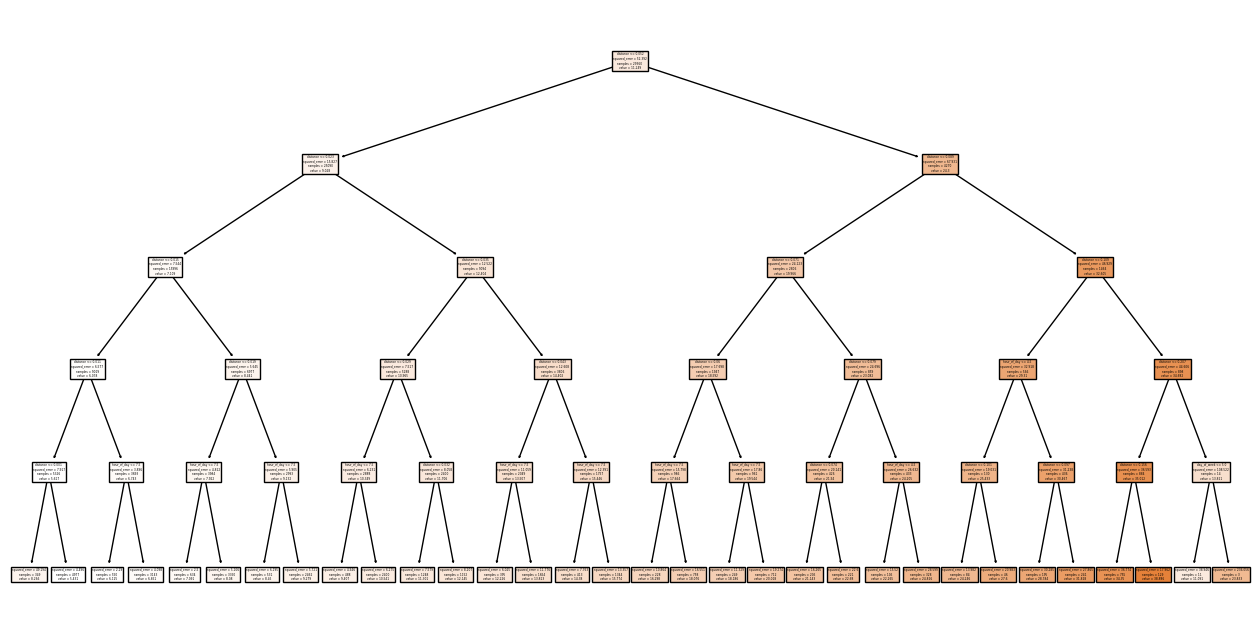

In [327]:
# Visualize the Decision Tree

num_feature_names = ['hour_of_day', 'day_of_week', 'occupancy', 'distance']

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8))
plot_tree(decision_tree, feature_names=num_feature_names, filled=True)
plt.show()

In [328]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Create a Decision Tree Regressor
decision_tree = DecisionTreeRegressor(random_state=42)

# Define a grid of hyperparameters to search
param_grid = {
    'max_depth': [5, 10, 15, None],  # Vary the maximum depth
    'min_samples_split': [2, 5, 10],  # Vary the minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4]  # Vary the minimum samples required at leaf nodes
}

# Create the GridSearchCV object
grid_search = GridSearchCV(decision_tree, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search to your data
grid_search.fit(x1_train, y1_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model from the grid search
best_decision_tree = grid_search.best_estimator_

# Evaluate the best model on the test set
y1_pred = best_decision_tree.predict(x1_test)

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y1_test, y1_pred)
r2 = r2_score(y1_test, y1_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Best Hyperparameters: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10}
Mean Squared Error: 10.188849939838226
R-squared: 0.8072680292586072
